# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [7]:
import pandas as pd
import numpy as np
file_path = "./data/airbnb_hw.csv"
airbnb_df = pd.read_csv(file_path)

airbnb_df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [8]:
# airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], downcast='float', errors='coerce')
airbnb_df['Price'] = airbnb_df['Price'].str.replace(',', '')
airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], downcast='float')

# have to cast this from object to float otherwise describe doesn't show proper stats
airbnb_df['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785461
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

In [9]:
airbnb_df['Price'].isnull().sum()

np.int64(0)

In [10]:
airbnb_df.sort_values(by='Price', ascending=False)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
23927,23248648,11/2/2014,NO LONGER BOOKING RESERVATIONS,Manhattan,Apartment,95.0,Entire home/apt,10025.0,2.0,1,21,10000.0,95.0
4002,1177497,9/18/2011,Film Location,Brooklyn,House,NaN,Entire home/apt,11205.0,5.0,1,0,8000.0,NaN
17900,11598359,1/24/2014,SUPER BOWL Brooklyn Duplex Apt!!,Brooklyn,Apartment,NaN,Entire home/apt,11238.0,4.0,1,0,6500.0,NaN
2405,496780,4/9/2011,test listing which is not real,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,5.0,1,0,5999.0,NaN
24136,23564279,11/10/2014,Breathtaking 2-Story Soho Penthouse,Manhattan,Apartment,NaN,Entire home/apt,10013.0,3.0,1,0,5000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,3991870,10/27/2012,1 Couch 8 min from Manhattan J\M\Z,Brooklyn,Apartment,80.0,Shared room,11206.0,1.0,1,17,20.0,81.0
18209,12122005,2/10/2014,Private Room in Bushwick Warehouse,Brooklyn,Apartment,NaN,Private room,11237.0,1.0,1,0,20.0,NaN
30087,41211757,8/11/2015,"Private Room in Brooklyn, NY",Brooklyn,Apartment,NaN,Private room,11219.0,1.0,1,0,10.0,NaN
19275,14381346,4/16/2014,Small sofa,Bronx,House,100.0,Shared room,10462.0,1.0,1,2,10.0,100.0


### 1.1: 
I cleaned the data by first removing the commas from Price so when converting the entire Price column to numeric, it actually includes the numbers greater than 999. Now it is also a float instead of an object which allows us to use pd.describe to find the max, where we confirm it now includes numbers greater than 999 as well. We can also now check for the number of null values, otherwise known as NaN, and we have no null values in Price.

### 1.2. 
Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 

In [11]:
police_file_path = './data/mn_police_use_of_force.csv'
police_df = pd.read_csv(police_file_path)

police_df.head(30)

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
5,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
6,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Female,20.0,Commission of Crime,1,Downtown West
7,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
8,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Unspecified,1,Downtown West
9,2016/01/01 02:38:23,Fight,No,DISCON,No,Chemical Irritant,Crowd Control Mace,Black,Male,18.0,commission of crime,1,Downtown West


In [12]:
missing_subject_injury = police_df['subject_injury'].isnull().sum()
print("total missing subject injury = " + str(missing_subject_injury))
print("missing subject injury proportion = " + str(missing_subject_injury/len(police_df)))

total missing subject injury = 9848
missing subject injury proportion = 0.7619342359767892


In [13]:
missing_injury_by_force = (police_df[police_df['subject_injury'].isna()].groupby('force_type').size().sort_values(ascending=False))
print(missing_injury_by_force)

force_type
Bodily Force                   7051
Chemical Irritant              1421
Taser                           985
Maximal Restraint Technique     170
Less Lethal                      87
Improvised Weapon                74
Police K9 Bite                   31
Gun Point Display                27
Baton                             2
dtype: int64


In [14]:
police_df['injury_nan'] = police_df['subject_injury'].isnull()
print('total missing values:', police_df['injury_nan'].sum())
print('proportion of missing values:', police_df['injury_nan'].mean())

missing_by_force = (police_df.groupby('force_type')['injury_nan'].agg(['sum', 'count', 'mean']).sort_values(by='mean', ascending=False))

missing_by_force.rename(columns={'sum': 'num_missing', 'count': 'total_records', 'mean': 'missing_proportion'}, inplace=True)

print(missing_by_force)

total missing values: 9848
proportion of missing values: 0.7619342359767892
                             num_missing  total_records  missing_proportion
force_type                                                                 
Less Lethal                           87             87            1.000000
Maximal Restraint Technique          170            170            1.000000
Chemical Irritant                   1421           1593            0.892028
Taser                                985           1307            0.753634
Bodily Force                        7051           9430            0.747720
Baton                                  2              4            0.500000
Improvised Weapon                     74            148            0.500000
Police K9 Bite                        31             77            0.402597
Gun Point Display                     27            104            0.259615
Firearm                                0              2            0.000000
Less Lethal 

There is a pattern where the data is missing mainly from the force types, such as bodily force and chemical irritants, that have lower injury rates than the other force types. It is a bit worrying that such a large percentage is missing though since we could have an issue where the only reason we're under the impression that these force types have less injuries is purely because they're underreported as well.</br>
But in regards to cleaning, I can't drop all of the rows that have nan's to clean them because they make up so much of the data here, so I will fill them up as No if they're nan based on the pattern we've seen.

In [15]:
police_df['subject_injury'] = police_df['subject_injury'].fillna("No")

In [16]:
crosstab = pd.crosstab(police_df['force_type'], police_df['subject_injury'])
print(crosstab)

subject_injury                 No   Yes
force_type                             
Baton                           2     2
Bodily Force                 8144  1286
Chemical Irritant            1552    41
Firearm                         2     0
Gun Point Display              60    44
Improvised Weapon             108    40
Less Lethal                    87     0
Less Lethal Projectile          1     2
Maximal Restraint Technique   170     0
Police K9 Bite                 33    44
Taser                        1135   172


### 1.3

3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`. 
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [17]:
justice_file = "./data/justice_data.parquet"
justice_df = pd.read_parquet(justice_file, engine='fastparquet')
justice_df.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [18]:
print(justice_df['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False))

justice_df['ReleasedPretrial'] = justice_df['WhetherDefendantWasReleasedPretrial'].map({'Yes': 1,'No': 0})


WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64


In [19]:
justice_df['ReleasedPretrial'] = justice_df['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)
print(justice_df['ReleasedPretrial'].value_counts(dropna=False))

ReleasedPretrial
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64


In [20]:
print(justice_df['ImposedSentenceAllChargeInContactEvent'].value_counts(dropna=False))
print(justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts(dropna=False))

ImposedSentenceAllChargeInContactEvent
                    9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
49.9712525667351       1
57.0349075975359       1
79.9260780287474       1
42.1642710472279       1
1.6570841889117        1
Name: count, Length: 484, dtype: int64
SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64


In [21]:
# 9 means not applicable/unknown but we keep 4 since other is still a valid category.
justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'] = justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'].replace(np.nan, 9)
print(justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts(dropna=False))

SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64


In [22]:
justice_df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(justice_df['ImposedSentenceAllChargeInContactEvent'],errors='coerce')

# if either 4 or 9 for sentence type, imposed sentence gets set to np.nan
justice_df.loc[(justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9) | (justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4),'ImposedSentenceAllChargeInContactEvent'] = np.nan

In [23]:
# need to floor the imposed sentence months because otherwise there are a bunch of unnecessary trailing floats
# note: needed astype int64 to keep nans
justice_df['ImposedSentenceAllChargeInContactEvent'] = np.floor(justice_df['ImposedSentenceAllChargeInContactEvent']).astype('Int64')

In [24]:
# checking that sentence type 4 is in fact set to not have an imposed sentence 
pd.crosstab(justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'], justice_df['ImposedSentenceAllChargeInContactEvent'].isna())

ImposedSentenceAllChargeInContactEvent,False,True
SentenceTypeAllChargesAtConvictionInContactEvent,,
0,8720,0
1,4299,0
2,914,0
4,0,8779
9,0,274


For ImposedSentenceAllChargeInContactEvent, the missing values aren't random since if SentenceTypeAllChargesAtConvictionInContactEvent is either 4(where the sentence type is other/dismissed) or 9(where the sentence type is unknown/not applicable which was then replaced with np.nan), there is no way for there to be an imposed sentence, which means we needed to replace it with np.nan. </br>
In addition to that, I floored imposed sentence because they were measured in months, so I would be able to reduce the noise and just see the sentence lengths measured in the nearest month, not a bunch of floats.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [25]:
shark_df = pd.read_excel("./data/GSAF5.xls", engine="xlrd")
shark_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
shark_cleaned = shark_df.drop(['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'], axis=1)
shark_cleaned.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,Laceration to right leg below the knee,N,1055 hrs,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White,Bob Myatt GSAF
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,Bite to thigh area,N,Not stated,Undetermined,Kevin McMurray Trackingsharks.com: NY Post


In [27]:
# step 3, checking year vars
print(shark_cleaned['Year'].unique())
print(shark_cleaned['Year'].describe())

[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909.
 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897.
 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888. 1887. 1886. 1885.
 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876. 1875. 1874. 1873.
 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865. 18

In [28]:
shark_cleaned['Year'] = pd.to_numeric(shark_cleaned['Year'], errors='coerce')
shark_cleaned = shark_cleaned.dropna(subset=['Year'])
shark_cleaned['Year'] = shark_cleaned['Year'].astype(int) # purely for legibility
shark_cleaned.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,16th August 2025,2025,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,Laceration to right leg below the knee,N,1055 hrs,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...
1,18th August,2025,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...
2,17th August,2025,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...
3,7th August,2025,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White,Bob Myatt GSAF
4,1st August,2025,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,Bite to thigh area,N,Not stated,Undetermined,Kevin McMurray Trackingsharks.com: NY Post


Axes(0.125,0.11;0.775x0.77) 



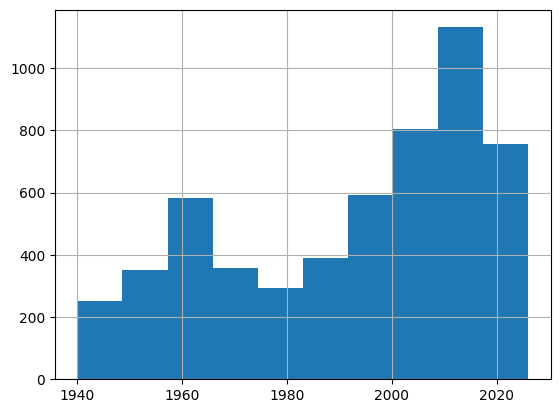

In [29]:
shark_recent = shark_cleaned.loc[shark_cleaned['Year'] >= 1940]
# attacks_per_year = shark_recent['Year'].value_counts().sort_index()

import matplotlib.pyplot as plt
print(shark_recent['Year'].hist(), '\n')


### 2.3 Year
The range of values goes from 0 to 2025, where some of the year values are set to 0 when the date is unclear or even during BC.
Additionally, attacks are increasing over time after 1940.

In [30]:
print(shark_recent['Age'].unique()[:30]) 
print(shark_recent['Age'].describe())

['?' '63' '9' '39' '19' '7' '85' '69' '18' '66' '21' '40' '37' '16' '20'
 '12' '42' '26' '14' '45' '30' '30+' '56' '40+' '29' 35 58 29 24 20]
count     3729
unique     237
top         19
freq        80
Name: Age, dtype: int64


In [ ]:
shark_recent.loc[:, 'Age'] = shark_recent['Age'].replace(['?'], np.nan)
shark_recent.loc[shark_recent['Age'].notna(), 'Age'] = shark_recent['Age'].astype(str).str.replace(r'\+', '', regex=True) # for all 30+ or 40+, we take the base number
shark_recent.loc[:, 'Age'] = pd.to_numeric(shark_recent['Age'], errors='coerce')

print(shark_recent['Age'].dropna().unique()[:235]) 
print(shark_recent['Age'].dropna().dtype)

[63.0 9.0 39.0 19.0 7.0 85.0 69.0 18.0 66.0 21.0 40.0 37.0 16.0 20.0 12.0
 42.0 26.0 14.0 45.0 30.0 56.0 29.0 35.0 58.0 24.0 55.0 17.0 36.0 23.0
 28.0 48.0 60.0 57.0 61.0 27.0 38.0 68.0 33.0 15.0 41.0 43.0 49.0 25.0
 46.0 65.0 64.0 13.0 11.0 32.0 10.0 62.0 22.0 52.0 44.0 47.0 59.0 8.0 50.0
 34.0 77.0 73.0 67.0 6.0 53.0 51.0 31.0 71.0 54.0 75.0 70.0 4.0 74.0 3.0
 82.0 72.0 5.0 86.0 84.0 87.0 1.0 81.0 78.0]
object


### 2.4 plot for age

<Axes: >

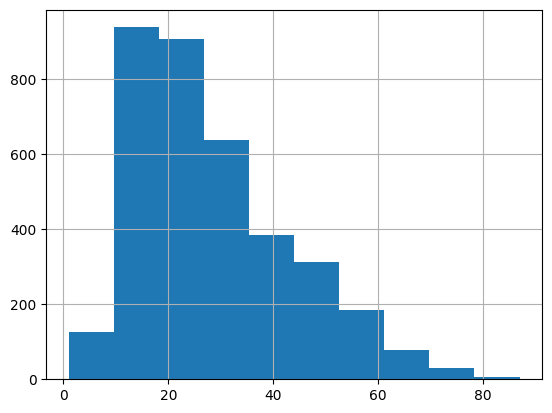

In [34]:
shark_recent['Age'].dropna().hist()

### 2.5 proportion male victims

In [ ]:
print(shark_recent['Sex'].unique()[:30]) 

['M' 'F' 'F ' 'M ' nan ' M' 'm' 'lli' 'M x 2']


In [37]:
shark_sex = shark_recent.copy()
shark_sex['Sex'] = shark_sex['Sex'].astype(str).str.strip().str.upper().replace({' nan ': np.nan, 'lli': np.nan}).str[0]
shark_sex['Sex'] = shark_sex['Sex'].where(shark_sex['Sex'].isin(['M', 'F']), np.nan)
shark_sex.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,16th August 2025,2025,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,NaN,Laceration to right leg below the knee,N,1055 hrs,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...
1,18th August,2025,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,NaN,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...
2,17th August,2025,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63.0,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...
3,7th August,2025,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9.0,None sustained board severely damaged,N,1630hrs,Suspected Great White,Bob Myatt GSAF
4,1st August,2025,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39.0,Bite to thigh area,N,Not stated,Undetermined,Kevin McMurray Trackingsharks.com: NY Post


In [43]:
male_count = (shark_sex['Sex'] == 'M').sum()
print("proportion of males attacked: " + str(male_count/len(shark_sex)))

proportion of males attacked: 0.786998365716361


### 2.6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?


In [44]:
print(shark_sex['Type'].unique()[:30]) 

['Provoked' 'Unprovoked' 'Questionable' 'unprovoked' ' Provoked'
 'Watercraft' 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat']


In [46]:
shark_type = shark_sex.copy()
# shark_type['Type'] = shark_type['Type'].astype(str).str.strip().replace({'nan': 'Unknown', '?': np.nan}).str[0]

# 1. strip all strings and capitalize first char
shark_type['Type'] = shark_type['Type'].astype(str).str.strip().str.capitalize()


# 2. set all non provoked/unprovoked types as unknown
valid_types = ['Provoked', 'Unprovoked']
shark_type['Type'] = shark_type['Type'].where(shark_type['Type'].isin(valid_types), 'Unknown')
print(shark_type['Type'].unique())

['Provoked' 'Unprovoked' 'Unknown']


In [49]:
proportion_unprovoked = (shark_type['Type'] == 'Unprovoked').mean()
print("proportion of unprovoked attacks: " + str(proportion_unprovoked))

proportion of unprovoked attacks: 0.7441438169602325


### 2.7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.

In [45]:
print(shark_sex['Fatal Y/N'].unique()[:30]) 

['N' 'Y' 'F' 'M' nan 'n' 'Nq' 'UNKNOWN' 2017 'Y x 2' ' N']


In [47]:
shark_fatal = shark_type.copy()

# 1. strip and uppercase strings
shark_fatal['Fatal Y/N'] = shark_fatal['Fatal Y/N'].astype(str).str.strip().str.capitalize()

# 2. set all non y/n vars as unknown
valid_types = ['Y', 'N']
shark_fatal['Fatal Y/N'] = shark_fatal['Fatal Y/N'].where(shark_fatal['Fatal Y/N'].isin(valid_types), 'Unknown')
print(shark_fatal['Fatal Y/N'].unique())

['N' 'Y' 'Unknown']


### 2.8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

In [ ]:
# unprovoked attacks on M / F
unprovoked = shark_fatal[shark_fatal['Type'] == 'Unprovoked']
sex_counts = unprovoked['Sex'].value_counts(dropna=False)
print(sex_counts)

Sex
M      3343
F       613
NaN     142
Name: count, dtype: int64


Sharks are more likely to launch unprovoked attacks on men.

In [52]:
# fatal if unprovoked / provoked
fatal = shark_fatal[shark_fatal['Fatal Y/N'] == 'Y']
unprovoked_counts = fatal['Type'].value_counts(dropna=False)
print(unprovoked_counts)

Type
Unprovoked    688
Unknown       123
Provoked       13
Name: count, dtype: int64


Shark atacks are more fatal when unprovoked.

In [53]:
# less likely to be fatal if victim is male or female?
sex_fatal_counts = fatal['Sex'].value_counts(dropna=False)
print(sex_fatal_counts)

Sex
M      659
F       89
NaN     76
Name: count, dtype: int64


Shark attacks are more fatal to males. </br>
I find shark attacks to be not terribly scary as I'm not actively provoking a shark or going into ocean water where there are a lot of sharks. The data is also a bit skewed as it seems so, I'm not terribly influenced by it.

### 2.9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [61]:
shark_species = shark_fatal.copy()
shark_species.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')

In [64]:
shark_species = shark_species.rename(columns={'Species ': 'Species'})
shark_species['Species'] = shark_species['Species'].astype(str).str.strip().str.capitalize()

# not doing str.split() bc it might be too slow for how much data we have
great_white = shark_species['Species'].str.contains('great white', na=False)
great_white_atk = great_white.sum()
proportion_gw = great_white_atk/len(shark_species)
print(f"proportion of great white attacks: {proportion_gw}")

proportion of great white attacks: 0.0005447612130016343
